In [48]:
import pandas as pd
df = pd.read_excel('baseDataSet_1.xlsx')
df.head
data=[]

In [49]:
df1 = df.reset_index()['courseAptitude']
df2 = df.reset_index()['verbalComprehension']
df3 = df.reset_index()['perceptualReasoning']
df4 = df.reset_index()['efficiency(Memory + Speed)']

In [50]:
def normalize(num, min_num, max_num):
    return (num - min_num) / (max_num - min_num)


In [51]:
df_1=[]
df_2=[]
#z = 0.05
z = 0.05
data.append(z)
def cus_range():
    for i in range(0,250):
        x1 = z*df1[i]+ df1[i]
        x2 = df1[i]*(1-z)
        if x1>0 and x2>0:
            df_1[i] = round(x1,2)
            df_2[i] = round(x2,2)    

In [52]:
df2_norm = []
df3_norm = []
df4_norm = []
for i in range(0,250):
    df2_norm.append(normalize(df2[i], 0, 1))
    df3_norm.append(normalize(df3[i], 0, 1))
    df4_norm.append(normalize(df4[i], 0, 1))


In [53]:
for i in range(0,250):
    x1 = z*df1[i]+ df1[i]
    x2 = df1[i]*(1-z)
    if x1>0 and x2>0:
        df_1.append(round(x1,2))
        df_2.append(round(x2,2))


In [54]:
df_user_iq = int(input())
percentage_user = (df_user_iq / 250)

In [55]:
if( 0<df_user_iq and df_user_iq<=84 ):
    print("Beginner Course")
elif(85 < df_user_iq and df_user_iq <= 168):
    print("Intermediate Course")
elif(168 < df_user_iq):
    print("Advanced Course")

Beginner Course


In [56]:
df2_ass1 = int(input())
df3_ass1 = int(input())
df4_ass1 = int(input())
ch =[]
level = 1

In [57]:
val1_df2_ass1 = (df2_ass1/10)*100
val1_df3_ass1 = (df3_ass1/10)*100
val1_df4_ass1 = (df4_ass1/10)*50
result_ass1 = (val1_df2_ass1*0.4) + (val1_df3_ass1*0.4) + (val1_df4_ass1*0.2)
percentage_ass1 = (result_ass1/250)
percentage_change = (percentage_ass1-percentage_user)*100

In [58]:
percentage_change

-4.400000000000001

In [59]:
result_ass1

56.0

In [60]:
original = 0
def change(current):
    if current > df_1[df_user_iq]:
        original = df_1[df_user_iq]
    elif current < df_2[df_user_iq]:
        original = df_2[df_user_iq]
    elif df_2[df_user_iq] <current and current < df_1[df_user_iq]:
        original = df_user_iq
    delta = ((current - original)/current)
    return delta

In [61]:
original

0

In [62]:
delta=change(result_ass1)
ch.append(delta)
final = 0
for i in range (0,level):
    final = ch[i]+final
final = final/level
z = z+final


In [63]:
data.append(z)

In [64]:
df_11=[]
df_12=[]
for i in range(0,250):
    x1 = z*df1[i]+ df1[i]
    x2 = df1[i]*(1-z)
    if x1>0 and x2>0:
        df_11.append(round(x1,2))
        df_12.append(round(x2,2))

In [65]:
data

[0.05, -0.10357142857142847]

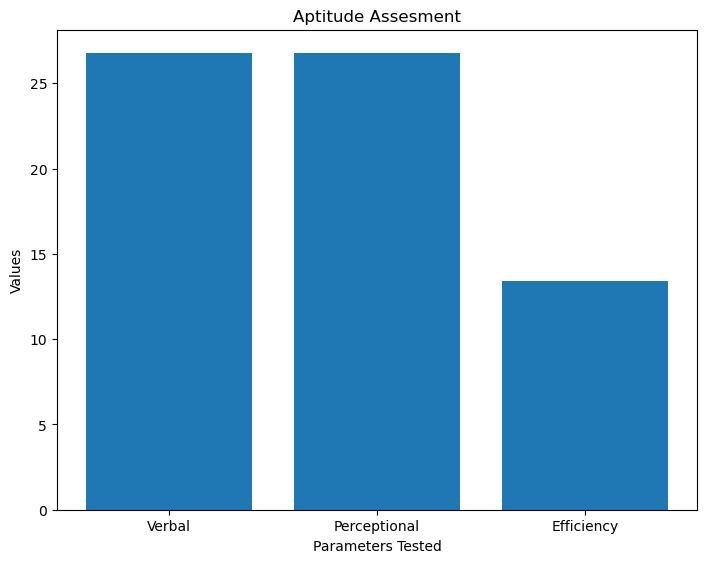

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the bar graph
x = np.array(['Verbal', 'Perceptional', 'Efficiency'])
y = np.array([df2[df_user_iq], df3[df_user_iq], df4[df_user_iq]])

# Create a figure with a larger size
plt.figure(figsize=(8, 6))

# Create a bar graph
plt.bar(x, y)

# Adjust the spacing between the bars
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Add labels and title to the graph
plt.xlabel('Parameters Tested')
plt.ylabel('Values')
plt.title('Aptitude Assesment')

# Show the graph
plt.show()


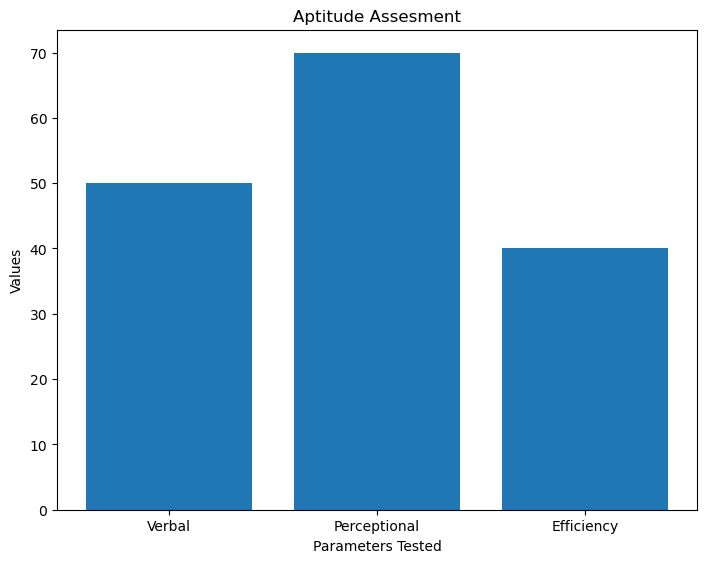

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the bar graph
x = np.array(['Verbal', 'Perceptional', 'Efficiency'])
y = np.array([val1_df2_ass1, val1_df3_ass1, val1_df4_ass1])

# Create a figure with a larger size
plt.figure(figsize=(8, 6))

# Create a bar graph
plt.bar(x, y)

# Adjust the spacing between the bars
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Add labels and title to the graph
plt.xlabel('Parameters Tested')
plt.ylabel('Values')
plt.title('Aptitude Assesment')

# Show the graph
plt.show()
